In [1]:
! nvidia-smi

Wed Aug  5 05:03:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%tensorflow_version 2.x

#Libraries we need to Import Initially

In [3]:
import os
import cv2
import shutil
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
import tensorflow as tf
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Import the drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
import zipfile
local_zip = '/content/drive/My Drive/project datasets/Malaria cell classification.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()
print("Done")

Done


#Display the datasets

In [6]:

infected_dir=r'/content/Malaria cell classification/cell_images/Parasitized'
uninfected_dir=r'/content/Malaria cell classification/cell_images/Uninfected'
train_data_dir=r'/content/Malaria cell classification/cell_images'

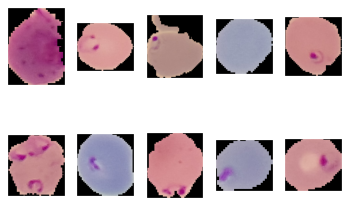

In [7]:
import cv2
import matplotlib.pyplot as plt
def main():
  j=0
  images=[]
  for i in os.listdir(infected_dir):
    if(j<=10):
      img1=cv2.imread(os.path.join(infected_dir,i),1)
      img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
      images.append(img1)
      j=j+1
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()
if __name__=="__main__":
  main()






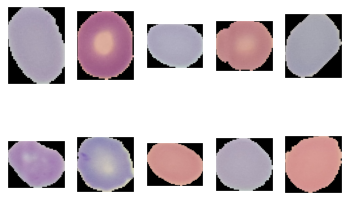

In [8]:
import cv2
import matplotlib.pyplot as plt
def main():
  j=0
  images=[]
  for i in os.listdir(uninfected_dir):
    if(j<=10):
      img1=cv2.imread(os.path.join(uninfected_dir,i),1)
      img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
      images.append(img1)
      j=j+1
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()
if __name__=="__main__":
  main()


#Image Augmentation and Generation

In [9]:

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=True,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.2,
    dtype=None,
)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128,128),
    batch_size=64,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(128,128),
    batch_size=64,
    subset='validation') # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = nb_epochs)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:

                                  
])

#Model


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,SeparableConv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [12]:
model=Sequential()
model.add(SeparableConv2D(32,(3,3),strides=(2,2),input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(64,(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(128,(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(512,(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(1024,(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 63, 63, 32)        155       
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 31, 31, 64)        2400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 15, 15, 128)       8

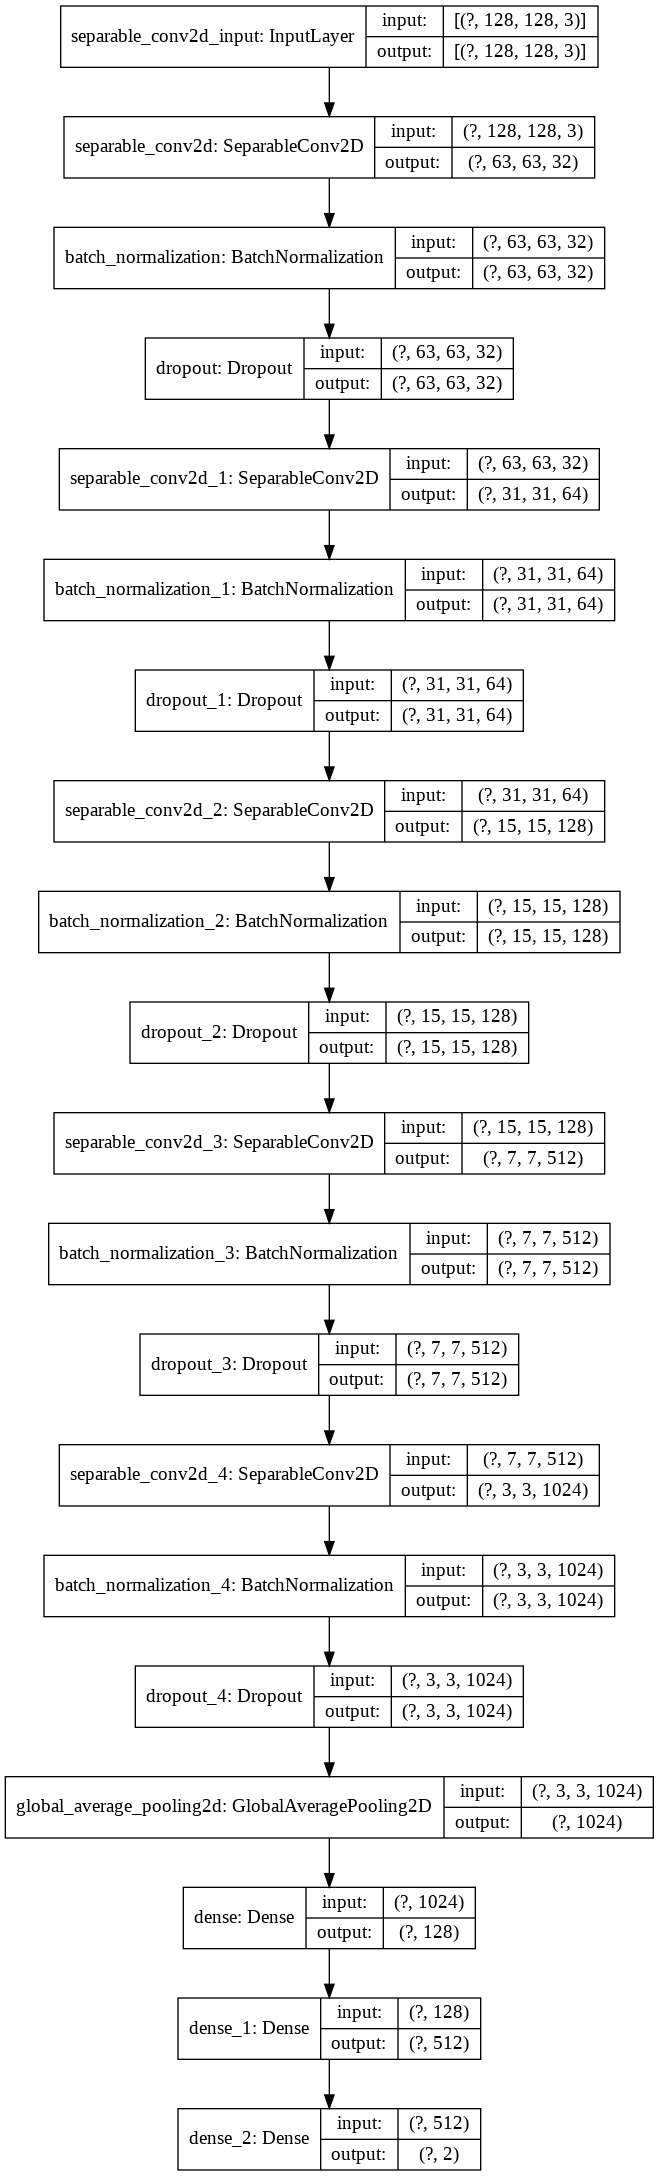

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [14]:
opt=tf.keras.optimizers.Nadam()
loss=tf.keras.losses.BinaryCrossentropy()
metrics=tf.keras.metrics.AUC
model.compile(optimizer=opt,loss=loss,metrics=['accuracy','AUC'])


In [15]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples //64,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples //64,
    epochs =15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
344/344 [==============================] - 128s 371ms/step - loss: 0.6600 - accuracy: 0.6191 - auc: 0.6542 - val_loss: 0.6759 - val_accuracy: 0.5665 - val_auc: 0.6570
Epoch 2/15
344/344 [==============================] - 126s 367ms/step - loss: 0.4725 - accuracy: 0.7798 - auc: 0.8579 - val_loss: 0.3365 - val_accuracy: 0.8543 - val_auc: 0.9316
Epoch 3/15
344/344 [==============================] - 126s 367ms/step - loss: 0.3846 - accuracy: 0.8344 - auc: 0.9089 - val_loss: 0.2996 - val_accuracy: 0.8837 - val_auc: 0.9473
Epoch 4/15
344/344 [==============================] - 126s 365ms/step - loss: 0.3406 - accuracy: 0.8618 - auc: 0.9291 - val_loss: 0.3181 - val_accuracy: 0.8775 - val_auc: 0.9472
Epoch 5/15
344/344 [==============================] - 126s 365ms/step - loss: 0.3143 - accuracy: 0.8753 - auc: 0.9395 - val_loss: 0.2577 - val_accuracy: 0.9006 - val_auc: 0.9600
Epoch 6/15
344/344 [==============

In [16]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples //64,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples //64,
    initial_epoch=15,
    epochs =20)

Epoch 16/20
344/344 [==============================] - 121s 353ms/step - loss: 0.2460 - accuracy: 0.9055 - auc: 0.9620 - val_loss: 0.2238 - val_accuracy: 0.9108 - val_auc: 0.9696
Epoch 17/20
344/344 [==============================] - 120s 348ms/step - loss: 0.2441 - accuracy: 0.9071 - auc: 0.9627 - val_loss: 0.2116 - val_accuracy: 0.9261 - val_auc: 0.9710
Epoch 18/20
344/344 [==============================] - 120s 348ms/step - loss: 0.2440 - accuracy: 0.9084 - auc: 0.9623 - val_loss: 0.2406 - val_accuracy: 0.9108 - val_auc: 0.9647
Epoch 19/20
344/344 [==============================] - 119s 347ms/step - loss: 0.2433 - accuracy: 0.9077 - auc: 0.9626 - val_loss: 0.2147 - val_accuracy: 0.9215 - val_auc: 0.9713
Epoch 20/20
344/344 [==============================] - 119s 347ms/step - loss: 0.2379 - accuracy: 0.9107 - auc: 0.9644 - val_loss: 0.2182 - val_accuracy: 0.9168 - val_auc: 0.9708


In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples //64,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples //64,
    initial_epoch=20,
    epochs =25)

Epoch 21/25
344/344 [==============================] - 124s 362ms/step - loss: 0.2147 - accuracy: 0.9223 - auc: 0.9707 - val_loss: 0.2154 - val_accuracy: 0.9139 - val_auc: 0.9717
Epoch 22/25
344/344 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.9240 - auc: 0.9716

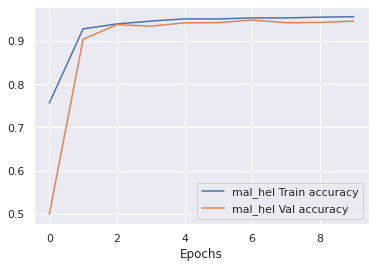

In [ ]:
def  plot_train_history(history):
    fig= plt.plot( figsize=(20, 5))
    plt.plot(history.history['acc'], label='mal_hel Train accuracy')
    plt.plot(history.history['val_acc'], label='mal_hel Val accuracy')
    plt.xlabel('Epochs')
    plt.legend()
plot_train_history(history)